In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Readin the data from Excel sheets
parsing_data = pd.read_excel('data/data_TSUM.xlsx', sheet_name='Data_Parsing')
company_data = pd.read_excel('data/data_TSUM.xlsx', sheet_name='Data_Company')
display(parsing_data.head(), company_data.head())

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153


In [221]:
# Tailoring the column names to make it easy to recongnize 
# our and competitors data on merged sheet later on.
# We need only item_id, color_id, current_price
parsing_data.drop(['brand', 'Category'], axis=1, inplace=True)
parsing_data.rename(columns={
    'price': 'competitor_price'
}, inplace=True)
company_data.rename(columns={
    'current price': 'our_price'
}, inplace=True)

display(parsing_data.head(), company_data.head())

,producer_id,producer_color,competitor_price
0,aaaaa1111_11,black,167
1,aaaaa1111_12,black,188
2,aaaaa1111_13,black,184
3,aaaaa1111_14,bla//ck,196
4,aaaaa1111_15,bla\\ck,250


,brand,Category,item_id,color_id,our_price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153


In [222]:
# Aligning the item_id/producer_id format:
display(parsing_data['producer_id'].apply(len).mean(), \
    company_data['item_id'].apply(len).mean())

12.0

11.0

In [223]:
# Only dash '-' is the difference.
# Let's remove it and other junk symbols in 'color' columns as well
junk_symbols = ['_', '-', '~', '\\', '/']
for col in ['producer_id', 'producer_color']:
    for i in range(parsing_data.shape[0]):
        parsing_data[col][i] = ''.join([c for c in parsing_data[col][i] if c not in junk_symbols])
parsing_data
# Now looks much better

/var/folders/c5/w191_qyn6h5cz3wl_4__rjxw0000gn/T/ipykernel_25937/1296423069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsing_data[col][i] = ''.join([c for c in parsing_data[col][i] if c not in junk_symbols])


,producer_id,producer_color,competitor_price
0,aaaaa111111,black,167
1,aaaaa111112,black,188
2,aaaaa111113,black,184
3,aaaaa111114,black,196
4,aaaaa111115,black,250
...,...,...,...
70,sssss111131,red,164
71,sssss111132,red,158
72,sssss111133,red,194
73,sssss111134,red,256


In [224]:
# Merging datasets
combined_data=company_data.merge(
    parsing_data,
    how='outer',
    left_on='item_id',
    right_on='producer_id'
)
# Checking if color are aligned
flag = combined_data[combined_data['producer_color'] != combined_data['color_id']].shape[0] == 0
print(f'Colors are aligned - {flag}')
# Drop the competitor's colors - we do not need them
combined_data.drop('producer_color', axis=1)
# Do we have NaN somewhere?
print(f'We have {combined_data.isnull().sum().sum()} NaN data')
# No discrepancies - well done
display(combined_data.head())


Colors are aligned - True
We have 0 NaN data


,brand,Category,item_id,color_id,our_price,producer_id,producer_color,competitor_price
0,Valentino,Shoes,aaaaa111111,black,247,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,161,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,234,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,167,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,153,aaaaa111115,black,250


In [225]:
# Calculating relative price difference
combined_data['price_diff'] = round(combined_data['competitor_price'] \
    / combined_data['our_price'] * 100, 1)
display(combined_data)

,brand,Category,item_id,color_id,our_price,producer_id,producer_color,competitor_price,price_diff
0,Valentino,Shoes,aaaaa111111,black,247,aaaaa111111,black,167,67.6
1,Valentino,Shoes,aaaaa111112,black,161,aaaaa111112,black,188,116.8
2,Valentino,Shoes,aaaaa111113,black,234,aaaaa111113,black,184,78.6
3,Valentino,Shoes,aaaaa111114,black,167,aaaaa111114,black,196,117.4
4,Valentino,Shoes,aaaaa111115,black,153,aaaaa111115,black,250,163.4
...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165,sssss111131,red,164,99.4
71,Stone Island,Bags,sssss111132,red,196,sssss111132,red,158,80.6
72,Stone Island,Bags,sssss111133,red,236,sssss111133,red,194,82.2
73,Stone Island,Bags,sssss111134,red,222,sssss111134,red,256,115.3


Text(0.5, 1.0, 'Our prices vs price difference')

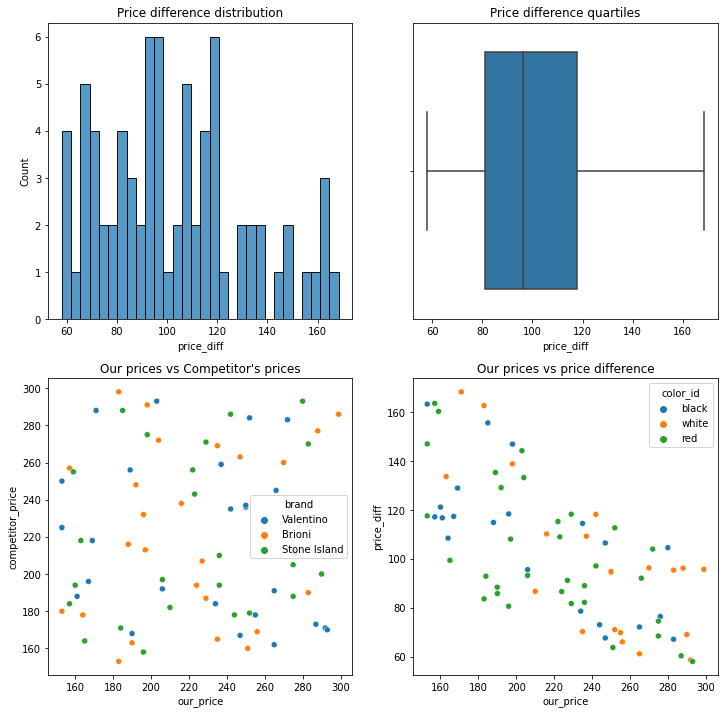

In [228]:
# Let's analise the data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

histplot = sns.histplot(
    data=combined_data,
    x='price_diff',
    bins=30,
    ax=axes[0, 0]
)
histplot.set_title('Price difference distribution')

boxplot = sns.boxplot(
    data=combined_data,
    x='price_diff',
    hue='brand',
    ax=axes[0, 1]
)
boxplot.set_title('Price difference quartiles')
scatterplot_1 = sns.scatterplot(
    data=combined_data,
    x='our_price',
    y='competitor_price',
    hue='brand',
    ax=axes[1, 0]
)
scatterplot_1.set_title("Our prices vs Competitor's prices")

scatterplot_2 = sns.scatterplot(
    data=combined_data,
    x='our_price',
    y='price_diff',
    hue='color_id',
    ax=axes[1, 1]
)
scatterplot_2.set_title('Our prices vs price difference')

# Observations and conclusions
- Data looks quite clean - nothing to exclude and no major outlies
- 50% of goods cost have 80-120% price difference
- Our and competitor's prices are **not aligned**.
- There is a trend for goods - the bigger our price the lower cost difference we have

*Advice:*
- We may want to adjust the costs of our goods: make cheap ones cheaper and make expensive ones more expensive.

In [227]:
# Write result data back to Excel
combined_data.to_excel('data/price_difference.xlsx', sheet_name='Combined_Data')